# North East Accelerometer Data Analysis

In [45]:
from IPython.core.display import display, HTML
display(HTML(r"""<style id=hide>div.input{display:none;}</style><button type="button"onclick="var myStyle = document.getElementById('hide').sheet;myStyle.insertRule('div.input{display:inherit !important;}', 0);">Show inputs</button>"""))

<h1>Importing Dependencies</h1>

In [46]:
## Importing dependencies
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.mlab as mlab

from plotly.subplots import make_subplots
from IPython.display import display, Image
from scipy import signal
from scipy.fft import fftshift

* updated from 2020_11_05 notebook

<h1> Accelerometer Information and Placement Information</h1>

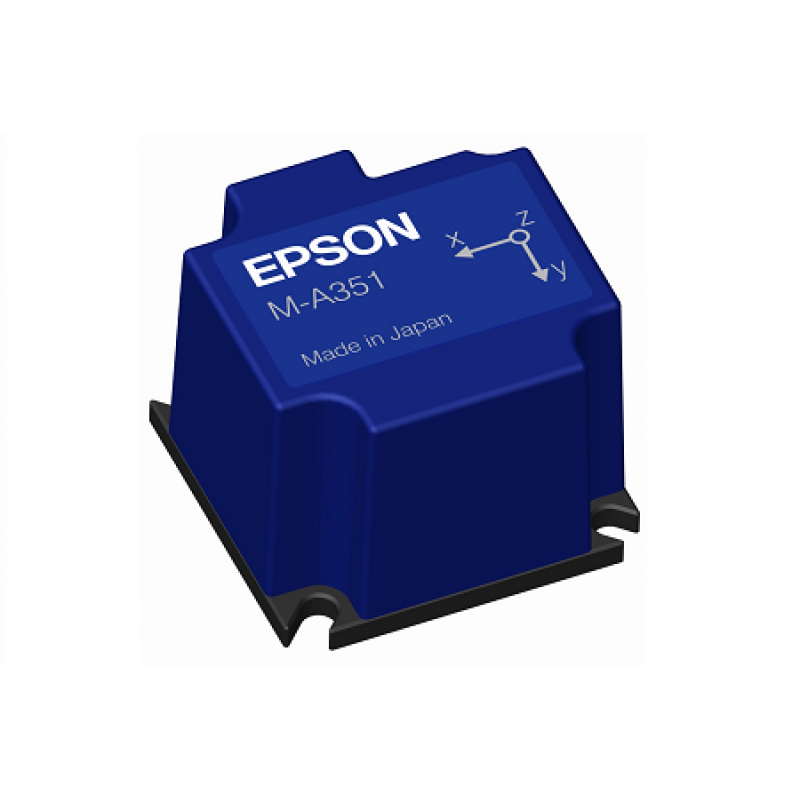

In [47]:
Image(filename='Epson_Acc.png',width=200, height=200)

**Accelerometer 4 (North-East) | Accelerometer Number: 1402**

* X : Pointing out of plane
* Y : Pointing up | NE direction
* Z : Pointing left | NW direction

Please refer to the image below for a visual representation

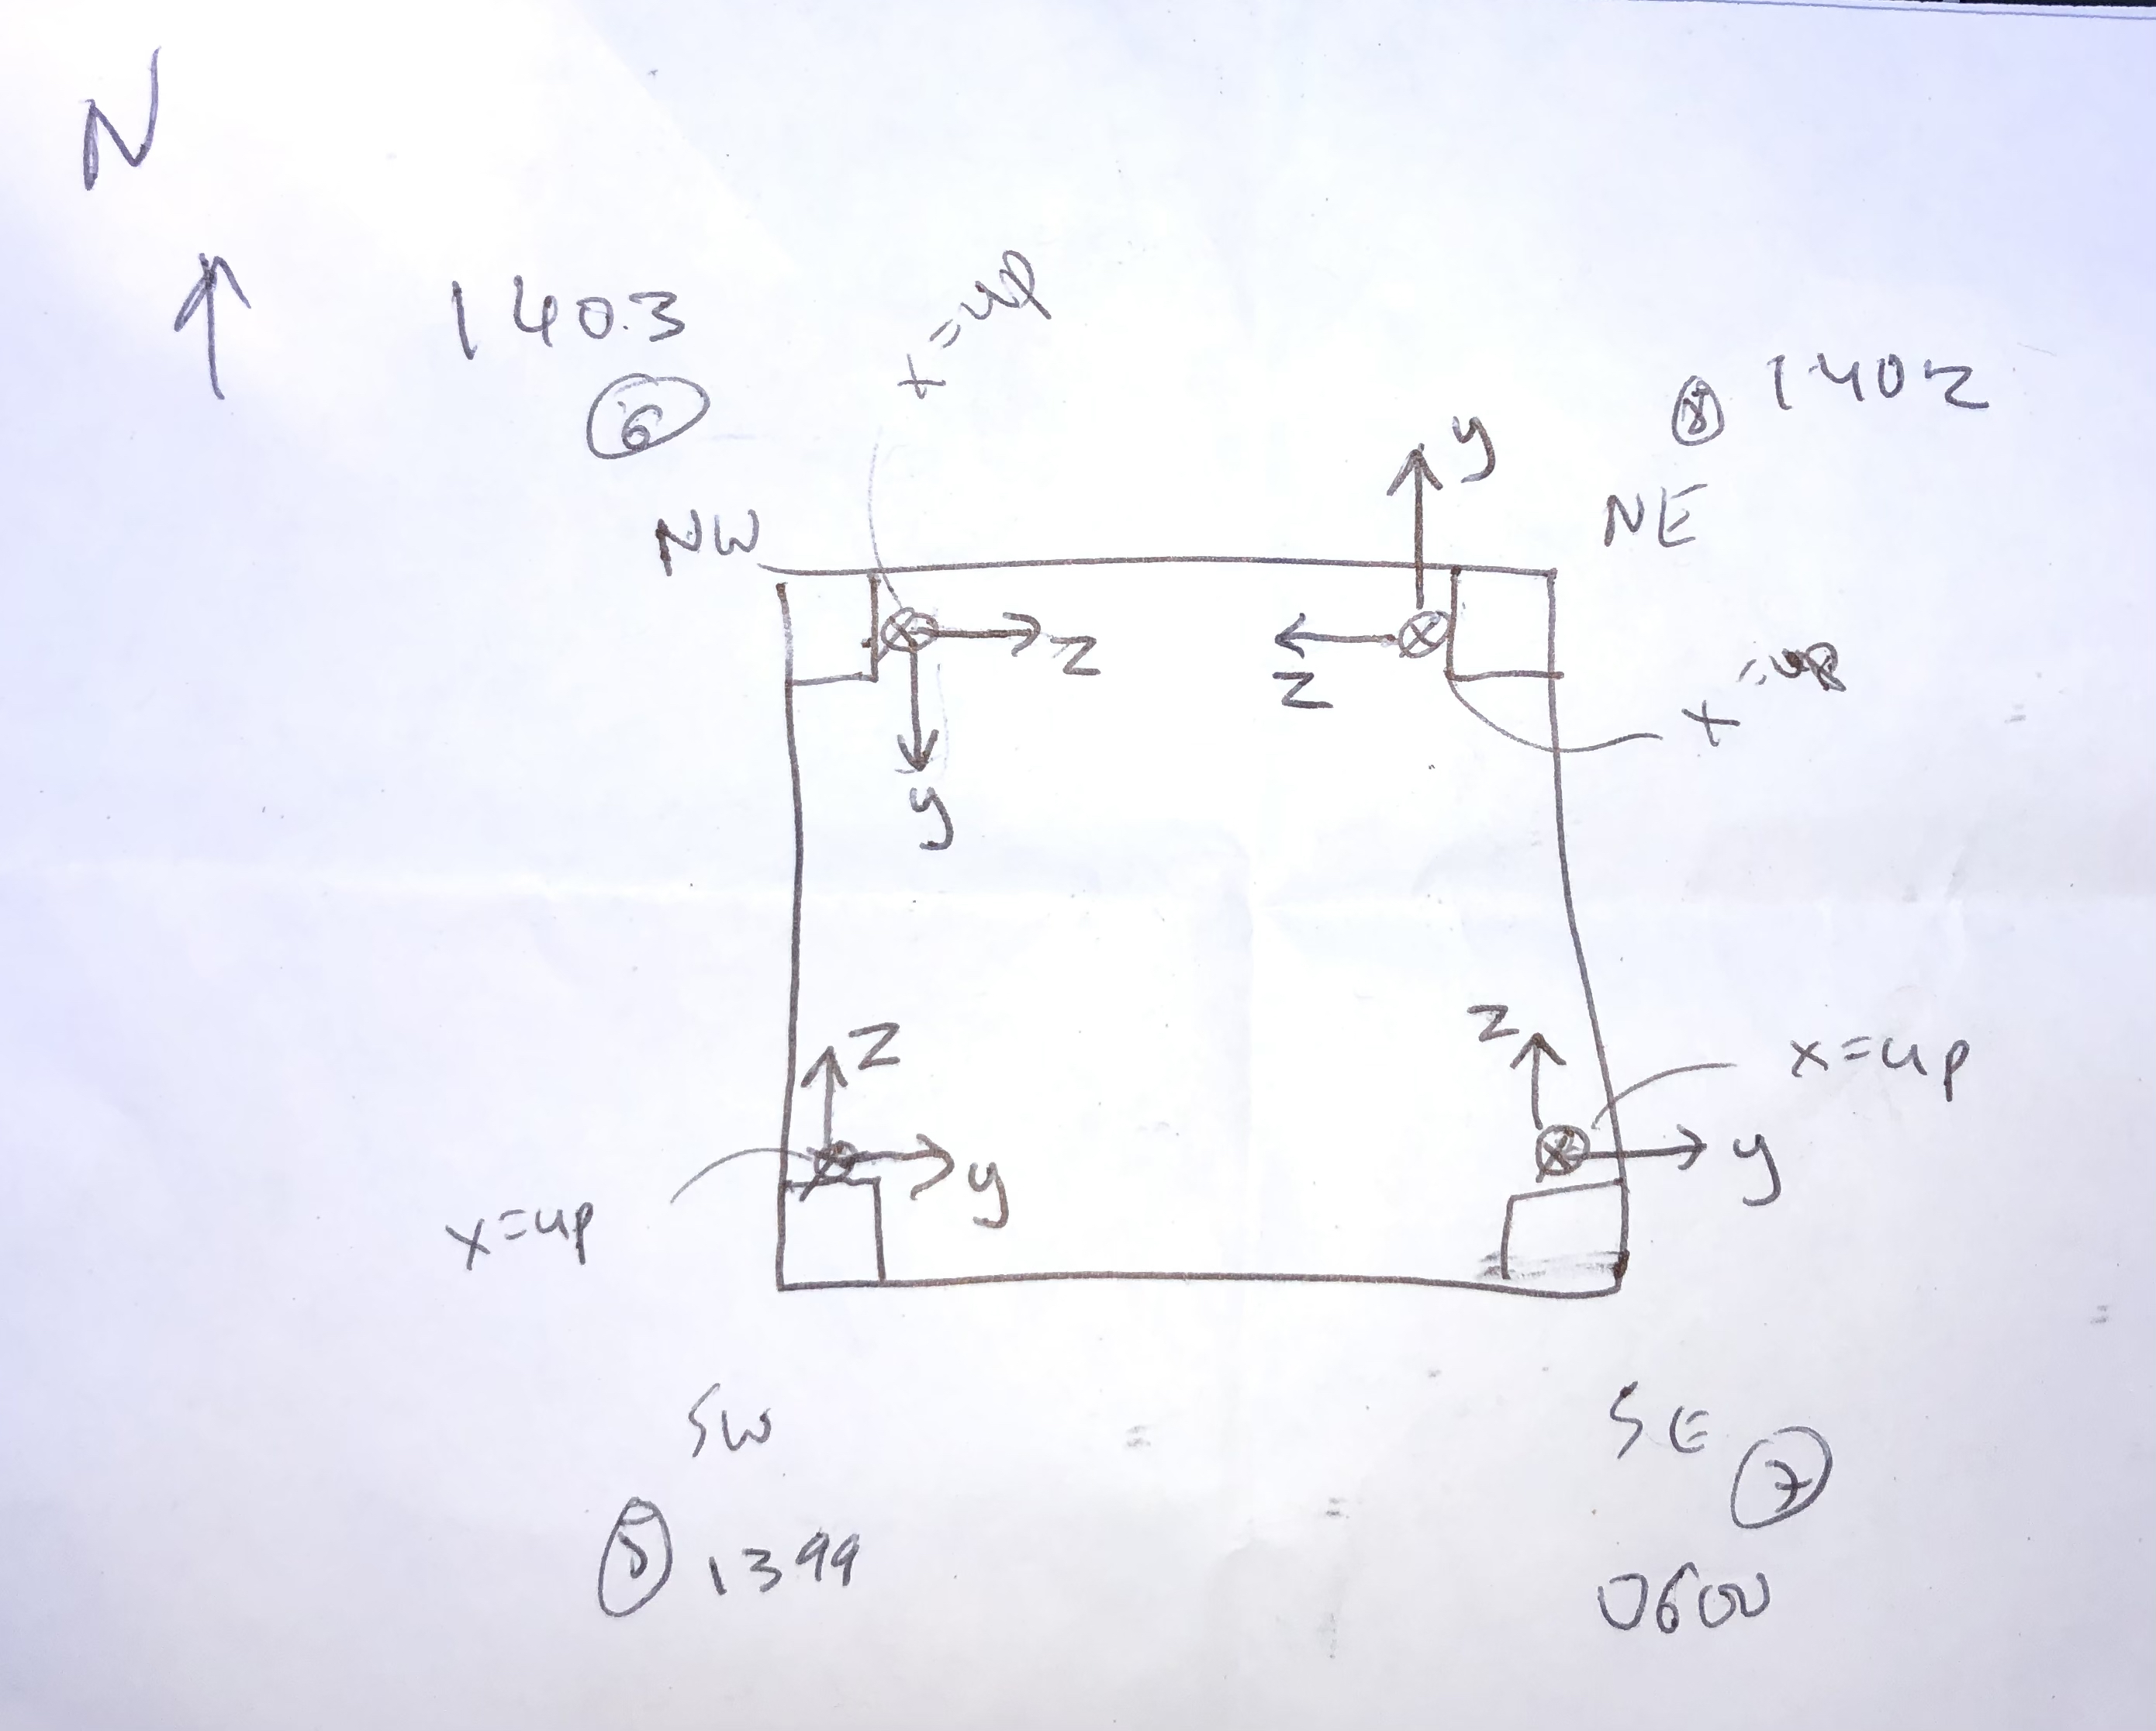

In [48]:
Image(filename='direction_.jpg',width=400, height=400)

<h1>Units Specification</h1>

* The acceleration is given as mG which **milli-G**, which is **1/1000 of a G**. G is Earth's gravity.
* Frequency is in **Hz**
* For the Power Spectral Frequency, the power is plotted as **10*log10(𝑃𝑥𝑥) for decibels**. The values of the power are given as **dB/Hz**

<h1> Uploading Full Acceleration Data and Normalization</h1>

**Comment:** We upload the data below corresponding to the NE Accelerometer

In [49]:
ne_df_original = pd.read_csv('NorthEast/NE.csv')
ne_df_original.head(5)

Sample No.  time[sec]       Ax[mG]     Ay[mG]     Az[mG]   ATotal[mG]  \
0           1      0.000  1002.844572  12.062907  10.852396  1002.975834   
1           2      0.002  1002.829492  12.024105  10.839164  1002.960147   
2           3      0.004  1002.837181  12.014031  10.863066  1002.967973   
3           4      0.006  1002.841711  12.053967  10.904431  1002.973430   
4           5      0.008  1002.827466  12.071192  10.914207  1002.959500   

   Ts[deg.C]  
0    15.4248  
1    15.4248  
2    15.4248  
3    15.4248  
4    15.4248

**Comment:** The code below normalize the data by **substracting** each the values in **Ax, Ay, and Az** by corresponding  ** first entry**.  

In [50]:
ne_df = pd.read_csv('NorthEast/NE.csv')
ne_df = ne_df.set_index('Sample No.')
# Normalizing the data
ne_df.rename(columns={'Ax[mG]':'Ax','Ay[mG]':'Ay','Az[mG]':'Az'}, inplace=True)
ne_df.Ax = ne_df.Ax-ne_df.Ax.iloc[0]
ne_df.Ay = ne_df.Ay-ne_df.Ay.iloc[0]
ne_df.Az = ne_df.Az-ne_df.Az.iloc[0]
ne_df.head(5)

time[sec]        Ax        Ay        Az   ATotal[mG]  Ts[deg.C]
Sample No.                                                                 
1               0.000  0.000000  0.000000  0.000000  1002.975834    15.4248
2               0.002 -0.015080 -0.038802 -0.013232  1002.960147    15.4248
3               0.004 -0.007391 -0.048876  0.010670  1002.967973    15.4248
4               0.006 -0.002861 -0.008940  0.052035  1002.973430    15.4248
5               0.008 -0.017106  0.008285  0.061811  1002.959500    15.4248

<h1>Acceleration Plots in X, Y, and Z direction [Full Recording Length]</h1>

We plot the time series plot for the acceleration in the X, Y, and Z direction. 

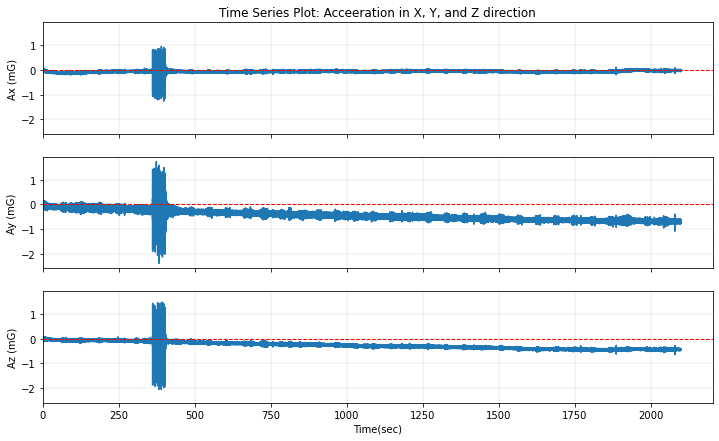

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 7), sharey="all",sharex="all")

ax1 = sns.lineplot(data=ne_df, x=ne_df['time[sec]'], y=ne_df["Ax"], ax=ax1)
ax1.set(ylabel="Ax (mG)", xlabel=None)
#ax1.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax1.axhline(y=0, color='r', linestyle='--',linewidth=1)
ax1.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax1.set_xlim(xmin=0)
#ax1.set_title('Time vs. Ax')
ax1.set_title('Time Series Plot: Acceeration in X, Y, and Z direction')

ax2=sns.lineplot(data=ne_df, x=ne_df['time[sec]'], y=ne_df["Ay"],ax=ax2)
ax2.set(ylabel="Ay (mG)")
#ax2.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)
ax2.grid(which='major',linestyle='--', linewidth='0.1', color='black')
#ax2.set_title('Time vs. Ay')

ax3=sns.lineplot(data=ne_df, x=ne_df['time[sec]'], y=ne_df["Az"],ax=ax3)
ax3.set(xlabel='Time(sec)', ylabel="Az (mG)")
ax3.axhline(y=0, color='r', linestyle='--',linewidth=1)
#ax3.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax3.grid(which='major',linestyle='--', linewidth='0.1', color='black')
#ax3.set_title('Time vs. Az')

plt.show()

#fig.savefig('TSPAXYZ.png')

__Comment__: 

We noticed that acceleration plot in the X direction is not drifting compared to the acceleration in the Y and Z direction. Or at least the acceleration in the X direction oscillate around the x=0 axis. This drift was probably voltage related or due to gravity. We will insvestigate this further by analysing the data generated by other accelerometers. 

<h1>Acceleration Data in X, Y, and Z direction for [350 sec - 434 sec] Timeframe </h1>

We create a new dataframe which would only select the time range of 350 sec to 434 sec where we notice great amount ofoscilation. 

In [52]:
ne_df_350_434 = ne_df.set_index('time[sec]')
ne_df_350_434= ne_df_350_434.loc[350:434]
ne_df_350_434['time[sec]'] = ne_df_350_434.index
ne_df_350_434.head(5)

Ax        Ay        Az   ATotal[mG]  Ts[deg.C]  time[sec]
time[sec]                                                                 
350.000   -0.047982 -0.225305 -0.050723  1002.924627   15.80469    350.000
350.002   -0.021517 -0.269592 -0.045657  1002.950620   15.80469    350.002
350.004    0.000537 -0.252068 -0.026822  1002.973081   15.80469    350.004
350.006   -0.013053 -0.194669 -0.025868  1002.960180   15.80469    350.006
350.008   -0.036478 -0.190913 -0.055074  1002.936488   15.80469    350.008

<h1> Subplots for [Ax, Ay, Az] for Timeframe [350 sec - 434 sec] </h1>

We create a subplot similar to the one for the fullr ecording length. 

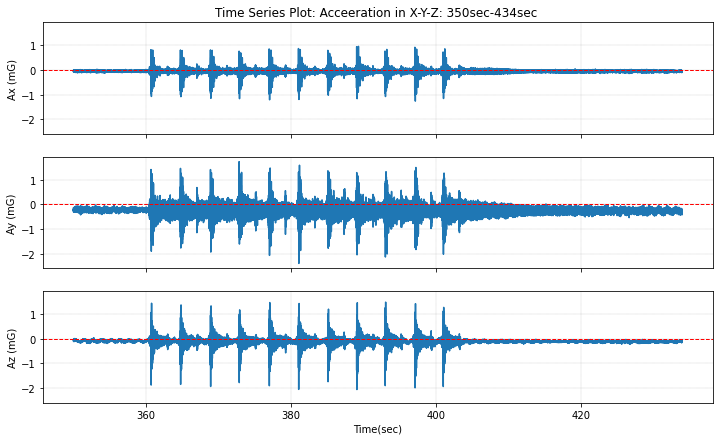

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 7), sharey="all",sharex="all")

ax1=sns.lineplot(data=ne_df_350_434, x=ne_df_350_434['time[sec]'], y=ne_df_350_434["Ax"],ax=ax1)
ax1.set(ylabel="Ax (mG)", xlabel=None)
ax1.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax1.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax1.axhline(linewidth=1, color='r',linestyle='--')
ax1.set_title('Time Series Plot: Acceeration in X-Y-Z: 350sec-434sec ')

ax2=sns.lineplot(data=ne_df_350_434, x=ne_df_350_434['time[sec]'], y=ne_df_350_434["Ay"],ax=ax2)
ax2.set(xlabel=None, ylabel="Ay (mG)")
ax2.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax2.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax2.axhline(linewidth=1, color='r',linestyle='--')
#ax2.set_title('Time vs. Ay');

ax3=sns.lineplot(data=ne_df_350_434, x=ne_df_350_434['time[sec]'], y=ne_df_350_434["Az"],ax=ax3)
ax3.set(xlabel='Time(sec)', ylabel="Az (mG)")
ax3.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax3.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax3.axhline(linewidth=1, color='r',linestyle='--');
#ax3.set_title('Time vs. Az');

fig.savefig('TSPAXYZ-350-434.png')

* We notice that much of the oscillation happends in the Y direction as represented in the image below for the Accelerometer 1402.
* We will continue by inspecting the time series of acceleration respectively for X,Y,and Z direction. 

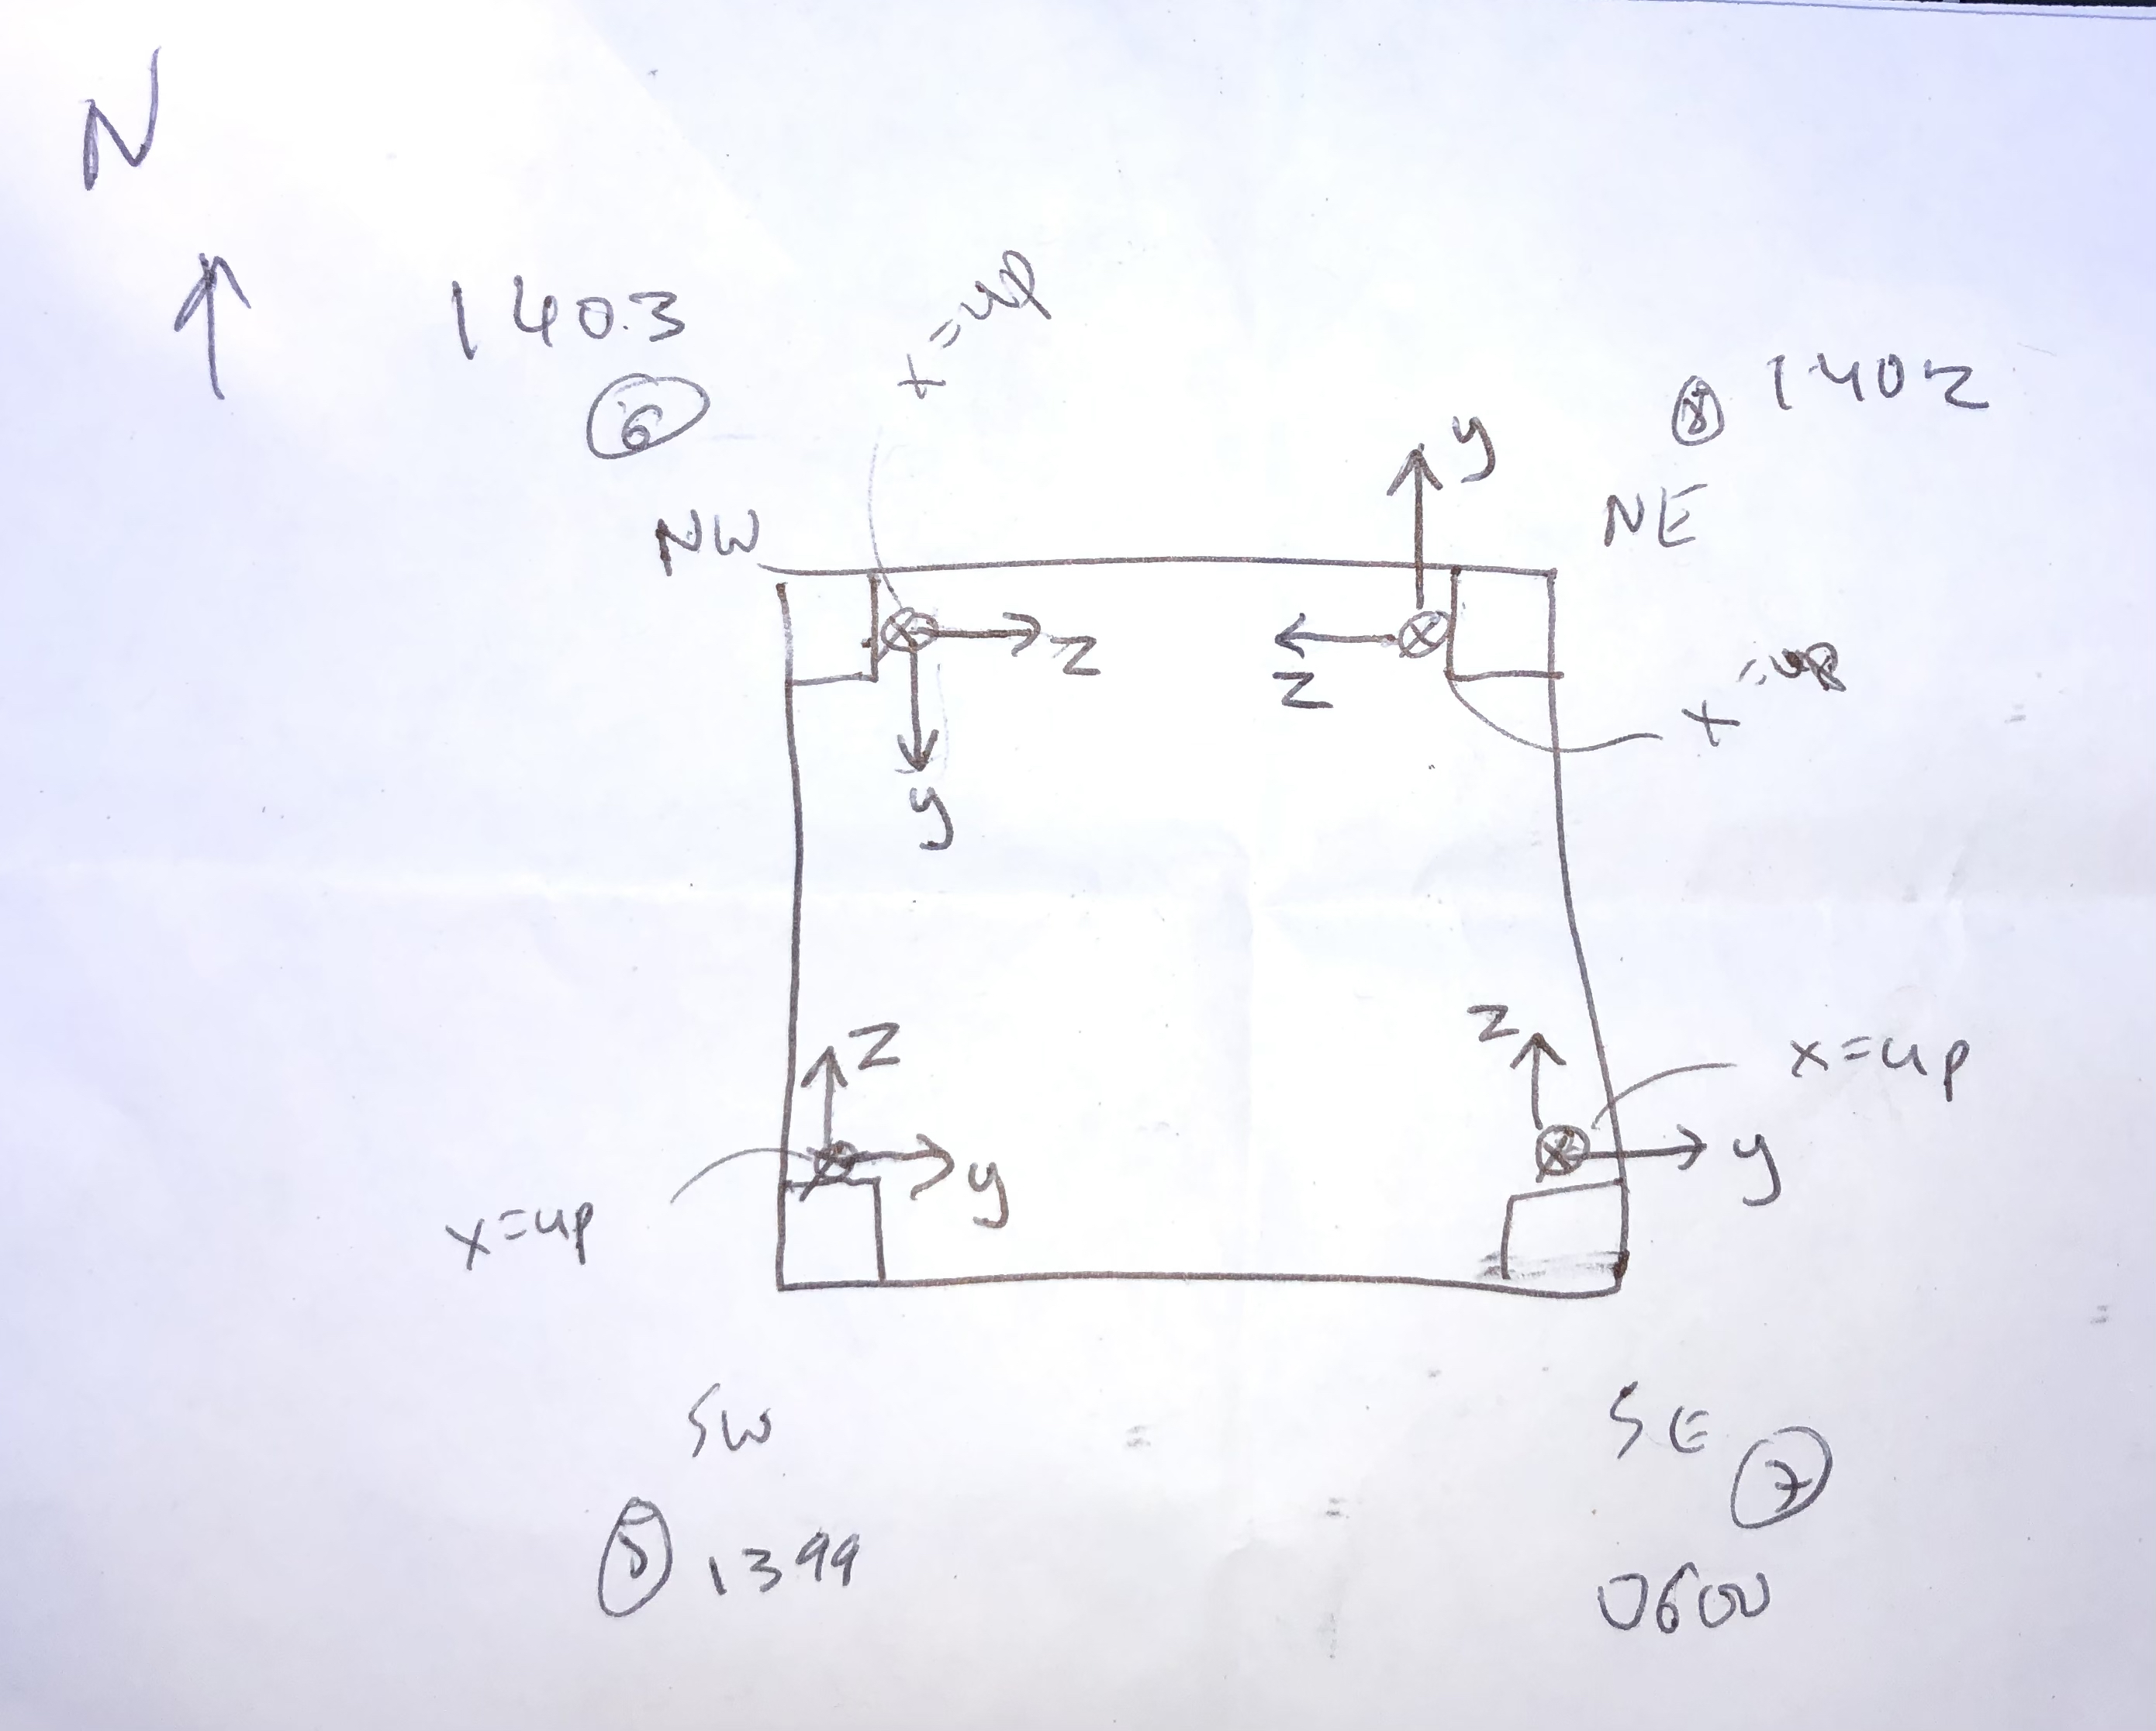

In [54]:
Image(filename='direction_.jpg',width=500, height=500)

In [55]:
sampling_rate = 500
ps_x,fs_x = plt.psd(ne_df_350_434['Ax'], Fs=500);
ps_y,fs_y = plt.psd(ne_df_350_434['Ay'], Fs=sampling_rate);
ps_z,fs_z = plt.psd(ne_df_350_434['Az'], Fs=sampling_rate);
plt.clf();

<Figure size 432x288 with 0 Axes>

<h1>Ax [Acc vs Time | Spectrogram | Power vs Frequency]</h1>

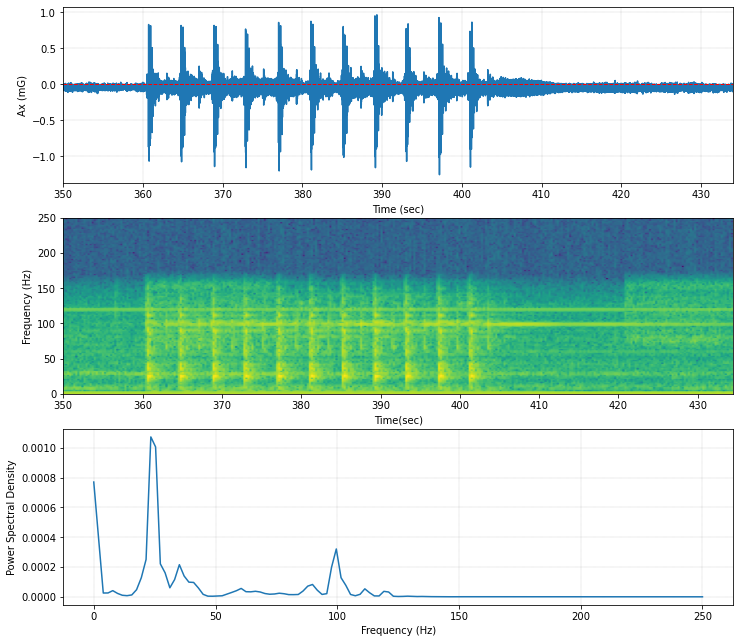

In [56]:
fig, axs = plt.subplots(3, figsize=(12, 11),sharex=False)
sampling_rate=500
axs[0].plot(ne_df_350_434['time[sec]'],ne_df_350_434["Ax"]);
axs[0].set_xlim(min(ne_df_350_434['time[sec]']),max(ne_df_350_434['time[sec]']))
axs[0].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
axs[0].set(xlabel='Time (sec)', ylabel="Ax (mG)")
axs[0].grid(which='major',linestyle='--', linewidth='0.1', color='black')
axs[0].axhline(linewidth=1, color='r',linestyle='--')

axs[1].specgram(ne_df_350_434["Ax"],Fs=500,xextent=(350, 434.44))
axs[1].set(xlabel='Time(sec)', ylabel="Frequency (Hz)");

axs[2].plot(fs_x, ps_x)
axs[2].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
axs[2].grid(which='major',linestyle='--', linewidth='0.1', color='black')

#fig.savefig('Ax-TS-F-PSD.png')

<h1>Ay [Acceleration vs Time | Spectrogram | Power vs Frequency]</h1>

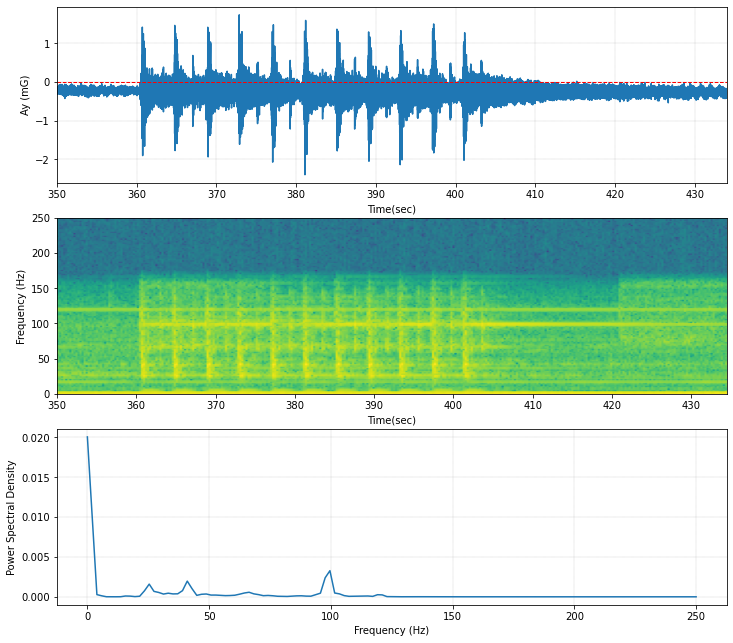

In [57]:
fig, axs = plt.subplots(3, figsize=(12, 11),sharex=False)
sampling_rate = 500
axs[0].plot(ne_df_350_434['time[sec]'],ne_df_350_434["Ay"]);
axs[0].set(xlabel='Time(sec)', ylabel="Ay (mG)")
axs[0].set_xlim(min(ne_df_350_434['time[sec]']),max(ne_df_350_434['time[sec]']))
axs[0].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
axs[0].grid(which='major',linestyle='--', linewidth='0.1', color='black')
axs[0].axhline(linewidth=1, color='r',linestyle='--')

axs[1].specgram(ne_df_350_434["Ay"],Fs=sampling_rate,xextent=(350, 434.44))
axs[1].set(xlabel='Time(sec)', ylabel="Frequency (Hz)")

axs[2].plot(fs_y, ps_y)
axs[2].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
axs[2].grid(which='major',linestyle='--', linewidth='0.1', color='black')

#fig.savefig('Ay-TS-F-PSD.png')

<h1>Az [Acceleration vs Time | Spectrogram | Power vs Frequency]</h1>

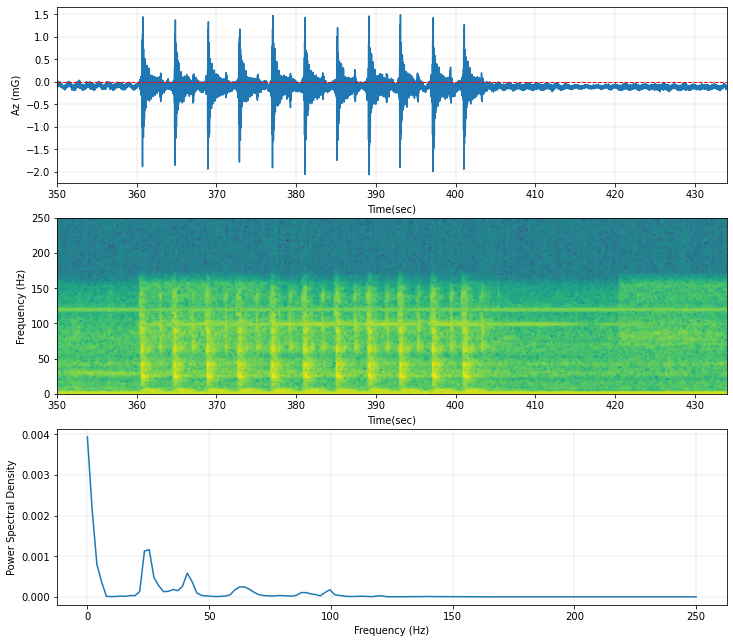

In [58]:
fig, axs = plt.subplots(3, figsize=(12, 11),sharex=False)
sampling_rate = 500
axs[0].plot(ne_df_350_434['time[sec]'],ne_df_350_434["Az"]);
axs[0].set_xlim(min(ne_df_350_434['time[sec]']),max(ne_df_350_434['time[sec]']))
axs[0].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
axs[0].set(xlabel='Time(sec)', ylabel='Az (mG)')
axs[0].grid(which='major',linestyle='--', linewidth='0.1', color='black')
axs[0].axhline(linewidth=1, color='r',linestyle='--')

axs[1].specgram(ne_df_350_434["Az"],Fs=500,xextent=(350, 434));
axs[1].set(xlabel='Time(sec)', ylabel="Frequency (Hz)");

axs[2].plot(fs_z, ps_z)
axs[2].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
axs[2].grid(which='major',linestyle='--', linewidth='0.1', color='black')

#fig.savefig('Az-TS-F-PSD.png')

<h1>Power Spectral Density Ax-Ay-Az Plotted Together</h1>

<h2> <i>First Plot </i></h2>

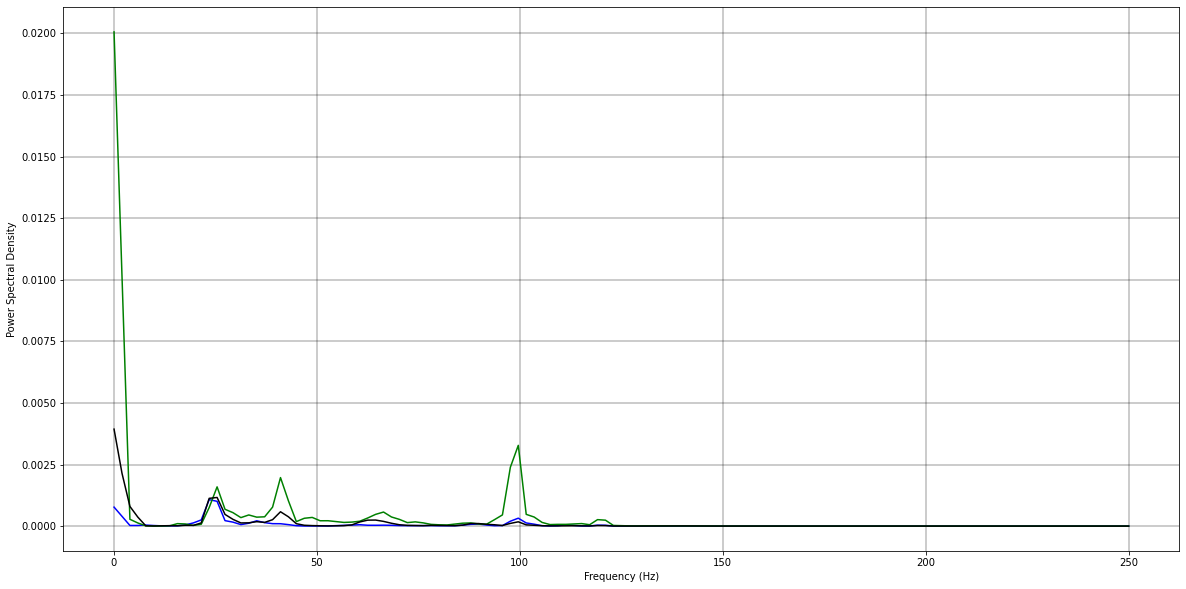

In [59]:
plt.figure(figsize=(20,10))
plt.plot(fs_x,ps_x,color = 'b',label='Ax')
plt.plot(fs_y,ps_y,color = 'g',label='Ay')
plt.plot(fs_z,ps_z,color = 'k',label='Az')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
plt.grid(which='major',linestyle='-', linewidth='0.4', color='black')

We observed a high power at 0 Hz. After further research on that, it is due to some detrend being set up to none.  
"Detrending is removing a constant or linear term (usually) from the data, defaulting to a constant-detrend. This is effectively subtracting the mean in each section of data over which the PSD is estimated. Subtracting the mean is equivalent to removing the DC or zero-frequency component from the spectrum."
We set up __detrend__ option to linear in order to get ride of the high peak we observed.

<h2> <i>Second plot</i></h2>

In [60]:
ps_x,fs_x = plt.psd(ne_df_350_434['Ax'], Fs=500,detrend='linear');
ps_y,fs_y = plt.psd(ne_df_350_434['Ay'], Fs=sampling_rate,detrend='linear');
ps_z,fs_z = plt.psd(ne_df_350_434['Az'], Fs=sampling_rate,detrend='linear');
plt.clf()

<Figure size 432x288 with 0 Axes>

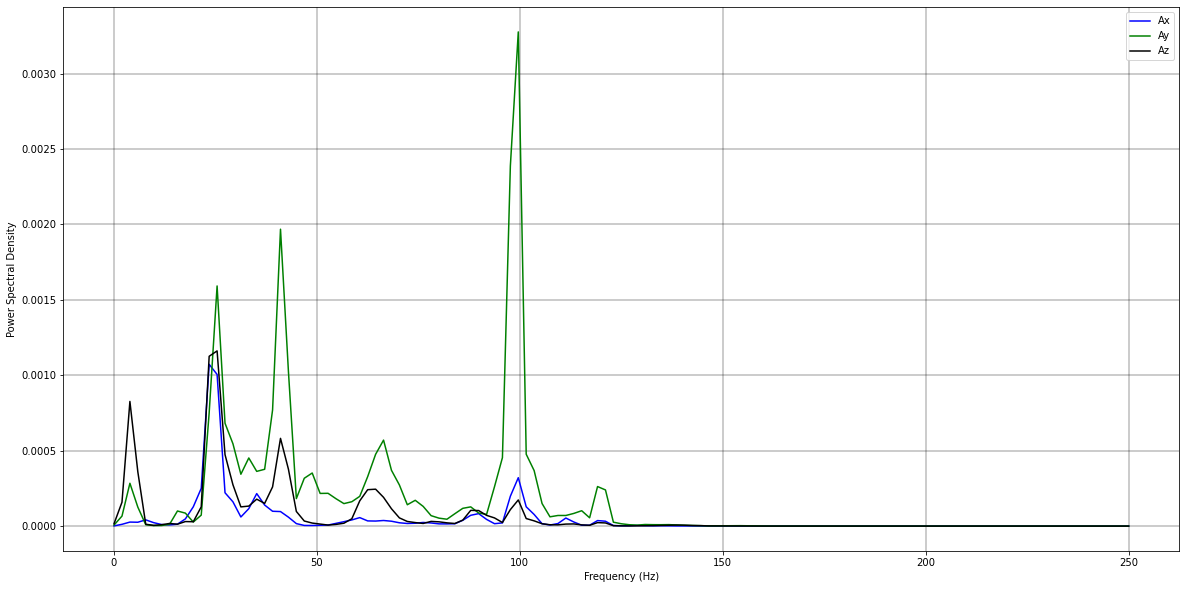

In [61]:
plt.figure(figsize=(20,10))
plt.plot(fs_x,ps_x,color = 'b',label='Ax')
plt.plot(fs_y,ps_y,color = 'g',label='Ay')
plt.plot(fs_z,ps_z,color = 'k',label='Az')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
plt.grid(which='major',linestyle='-', linewidth='0.4', color='black')
plt.grid(which='minor',linestyle='-', linewidth='0.4', color='black')
plt.legend();

<h1>Subplots [Ax, Ay, Az] for 2 sec Time Frame [360 sec - 362 sec] </h1>

In [62]:
ne_fp = ne_df.set_index('time[sec]')
ne_fp= ne_fp.loc[360:362]
ne_fp['time[sec]'] = ne_fp.index
ne_fp.head(5)

Ax        Ay        Az   ATotal[mG]  Ts[deg.C]  time[sec]
time[sec]                                                                 
360.000   -0.008047 -0.247836 -0.112295  1002.963630   15.80762    360.000
360.002    0.011623 -0.255465 -0.102937  1002.983307   15.80762    360.002
360.004   -0.004291 -0.221193 -0.083506  1002.968007   15.80762    360.004
360.006   -0.031888 -0.252902 -0.086128  1002.940012   15.80762    360.006
360.008   -0.033140 -0.330269 -0.099241  1002.937711   15.80762    360.008

**Comment:** The plot below also show the LowPass filter at **4 Hz**

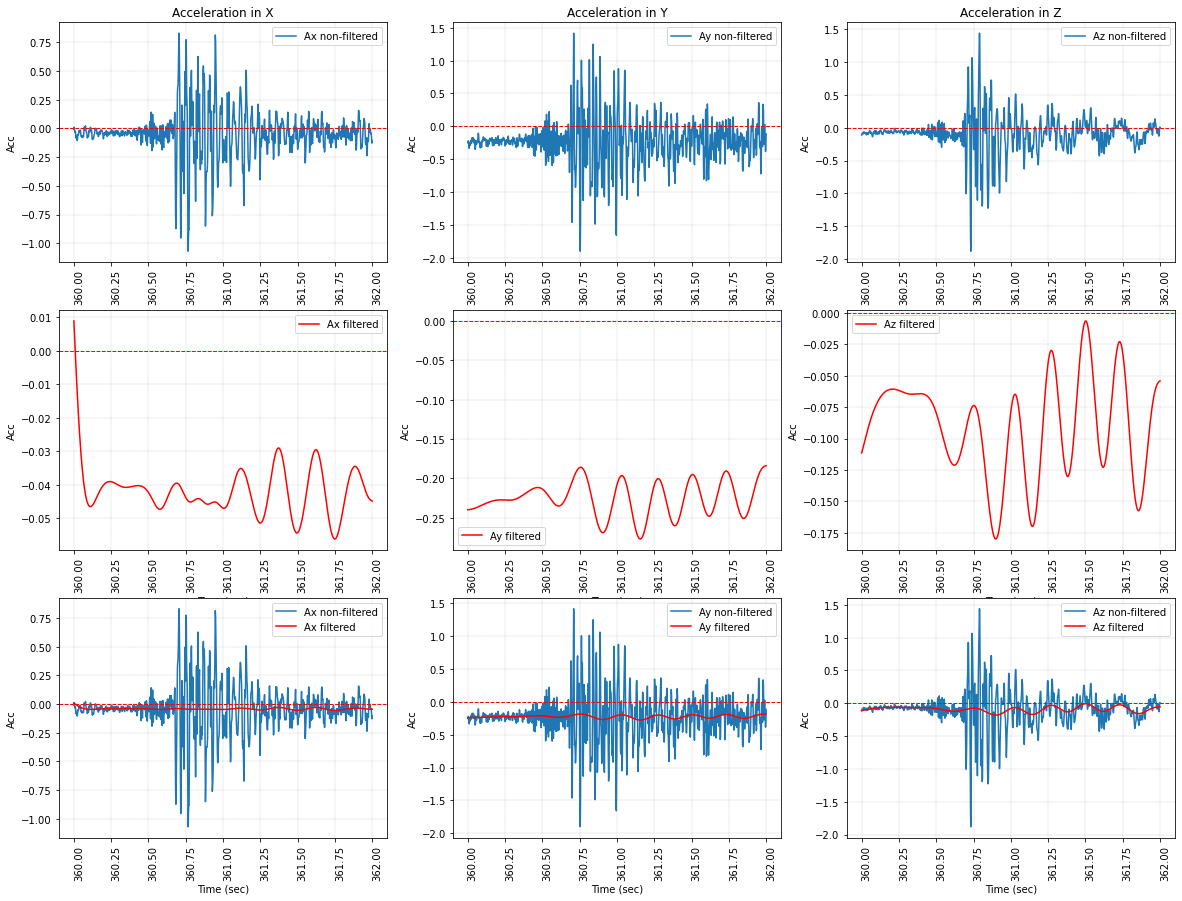

In [63]:
#### Create a filtering function

import numpy as np
from scipy.signal import butter,filtfilt

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

fs = 500       # sample rate, Hz
cutoff = 4      # desired cutoff frequency of the filter, Hz 
nyq = 0.5 * fs  # Nyquist Frequency
order = 3       # sin wave can be approx represented as quadratic


Ax_data_filtered = butter_lowpass_filter(ne_fp['Ax'], cutoff, fs, order)
Ay_data_filtered = butter_lowpass_filter(ne_fp['Ay'], cutoff, fs, order)
Az_data_filtered = butter_lowpass_filter(ne_fp['Az'], cutoff, fs, order)




fig, ax = plt.subplots(3,3,figsize=(20, 15))


ax[0,0].plot(ne_fp['time[sec]'].values, ne_fp["Ax"],label='Ax non-filtered')
ax[0,0].set_title('Acceleration in X')
ax[1,0].plot(ne_fp['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')

ax[2,0].plot(ne_fp['time[sec]'].values, ne_fp["Ax"],label='Ax non-filtered')
ax[2,0].plot(ne_fp['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')


ax[0,1].plot(ne_fp['time[sec]'].values, ne_fp["Ay"],label='Ay non-filtered')
ax[0,1].set_title('Acceleration in Y')
ax[1,1].plot(ne_fp['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')

ax[2,1].plot(ne_fp['time[sec]'].values, ne_fp["Ay"],label='Ay non-filtered')
ax[2,1].plot(ne_fp['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')


ax[0,2].plot(ne_fp['time[sec]'].values, ne_fp["Az"],label='Az non-filtered')
ax[0,2].set_title('Acceleration in Z')
ax[1,2].plot(ne_fp['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')

ax[2,2].plot(ne_fp['time[sec]'].values, ne_fp["Az"],label='Az non-filtered')
ax[2,2].plot(ne_fp['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')


for i in [0,1,2]:
    for j in [0,1,2]:
        ax[i,j].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
        ax[i,j].grid(which='major',linestyle='--', linewidth='0.1', color='black')
        ax[i,j].axhline(linewidth=1, color='r',linestyle='--')
        ax[i,j].set(xlabel='Time (sec)', ylabel="Acc");
        plt.setp(ax[i,j].get_xticklabels(), rotation=90, ha="left")
        ax[i,j].legend()
        
#fig.savefig("FR-unf-and-f-plot.jpg")

In [64]:
Ax_data_filtered = butter_lowpass_filter(ne_fp['Ax'], cutoff, fs, order)
Ay_data_filtered = butter_lowpass_filter(ne_fp['Ay'], cutoff, fs, order)
Az_data_filtered = butter_lowpass_filter(ne_fp['Az'], cutoff, fs, order)

<h1>Frequency Spectrum of the Filtered Data</h1>

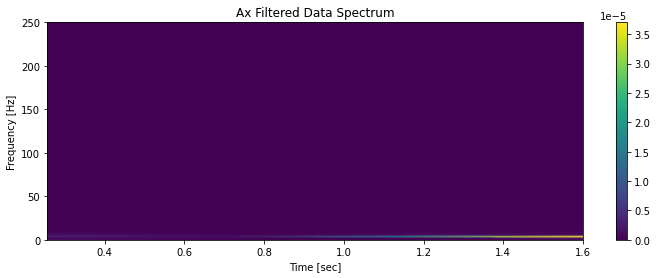

In [65]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Ax_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ax Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

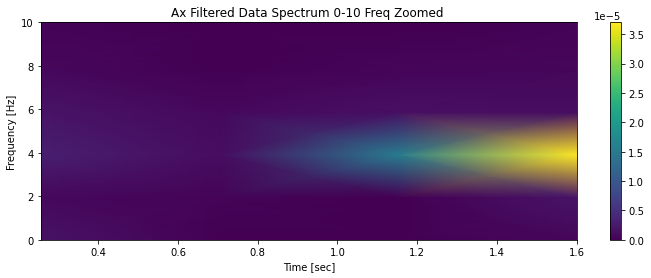

In [66]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Ax_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,10))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ax Filtered Data Spectrum 0-10 Freq Zoomed ')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

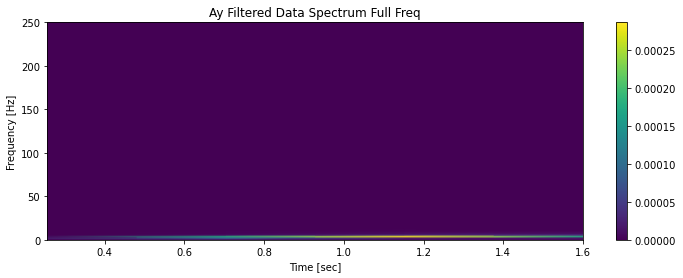

In [67]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Ay_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ay Filtered Data Spectrum Full Freq')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

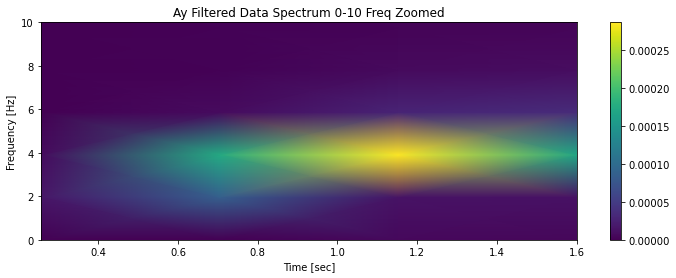

In [68]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Ay_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,10))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ay Filtered Data Spectrum 0-10 Freq Zoomed')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

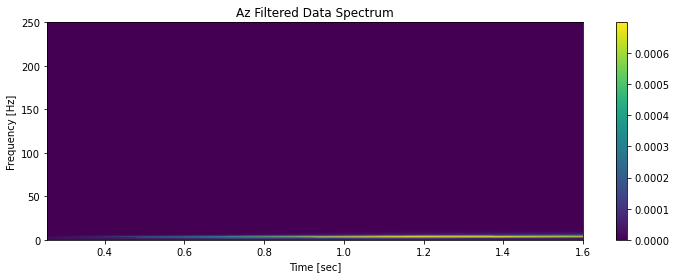

In [69]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Az_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Az Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

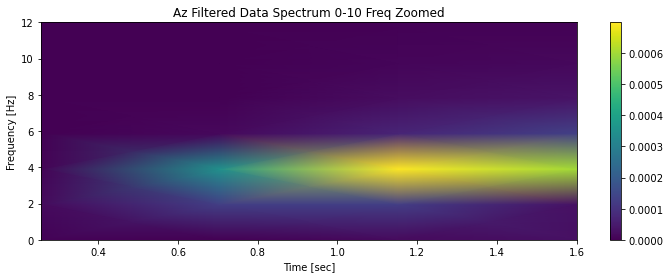

In [70]:
plt.figure(figsize=(12,4))
fs = 500
f, t, Sxx = signal.spectrogram(Az_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,12))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Az Filtered Data Spectrum 0-10 Freq Zoomed')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Power Spectrum Density [360 sec - 362 sec] Timeframe

In [71]:
plt.figure(figsize=(12,4))
psx_f,fsx_f = plt.psd(Ax_data_filtered, Fs=sampling_rate,detrend='linear');
psy_f,fsy_f = plt.psd(Ay_data_filtered, Fs=sampling_rate,detrend='linear');
psz_f,fsz_f = plt.psd(Az_data_filtered, Fs=sampling_rate,detrend='linear');
plt.clf()

<Figure size 864x288 with 0 Axes>

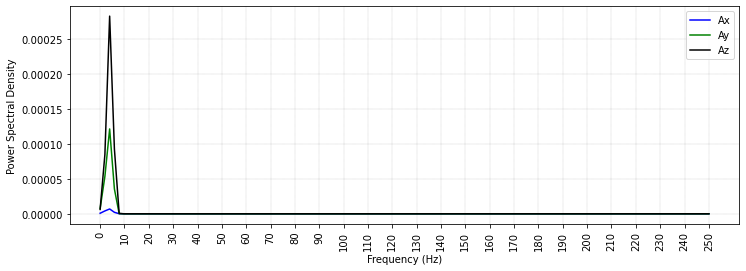

In [72]:
plt.figure(figsize=(12,4))
plt.plot(fsx_f,psx_f,color = 'b',label='Ax')
plt.plot(fsy_f,psy_f,color = 'g',label='Ay')
plt.plot(fsz_f,psz_f,color = 'k',label='Az')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
plt.xticks(np.arange(min(fsz_f), max(fsz_f)+1, 10))
plt.xticks(rotation=90)
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.legend()
plt.show()

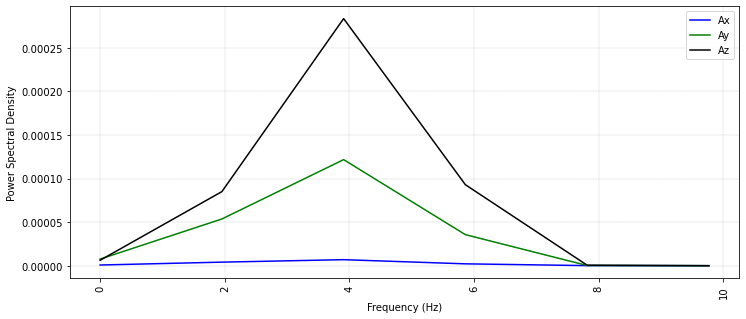

In [73]:
plt.figure(figsize=(12,5))
plt.plot(fsx_f[0:6],psx_f[0:6],color = 'b',label='Ax')
plt.plot(fsy_f[0:6],psy_f[0:6],color = 'g',label='Ay')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
plt.plot(fsz_f[0:6],psz_f[0:6],color = 'k',label='Az')
#plt.xticks(np.arange(0, 6, .1))
plt.xticks(rotation=90)
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.legend()
plt.show()

<h1>After Bell Ring Analysis</h1>

We explore the vibration of the structure when the bell stop rigging. The time span taken is between 750 second and 1250 sec. We consequently generate the follwing plots:

In [74]:
ne_after_rings = ne_df.set_index('time[sec]')
ne_after_rings= ne_after_rings.loc[500:]
ne_after_rings['time[sec]'] = ne_after_rings.index
ne_after_rings.head(5)

Ax        Ay        Az   ATotal[mG]  Ts[deg.C]  time[sec]
time[sec]                                                                 
500.000   -0.075519 -0.293612 -0.142097  1002.895309   15.92383    500.000
500.002   -0.068903 -0.324845 -0.153720  1002.901434   15.92383    500.002
500.004   -0.055671 -0.305176 -0.141918  1002.915021   15.92383    500.004
500.006   -0.066459 -0.266552 -0.131428  1002.904799   15.92383    500.006
500.008   -0.080407 -0.280738 -0.143110  1002.890562   15.92383    500.008

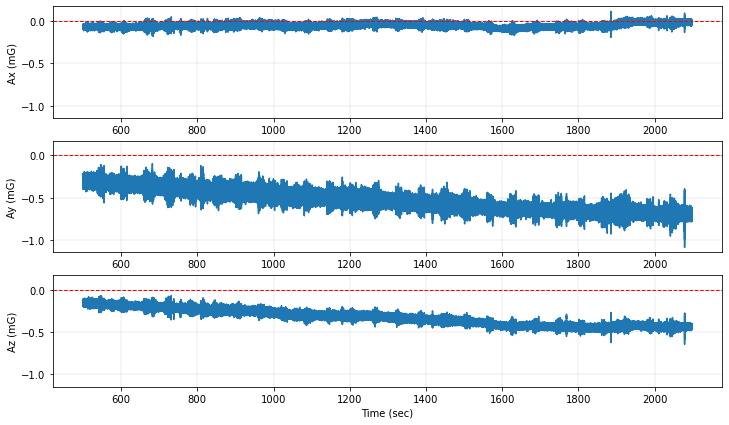

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 7), sharey="all")
df =ne_after_rings
ax1=sns.lineplot(data=df, x=df['time[sec]'], y=df["Ax"],ax=ax1)
ax1.set(ylabel="Ax (mG)", xlabel=None)
ax1.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax1.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax1.axhline(linewidth=1, color='r',linestyle='--')
#ax1.set_title('Time vs. Ax')

ax2=sns.lineplot(data=df, x=df['time[sec]'], y=df["Ay"],ax=ax2)
ax2.set(xlabel=None, ylabel="Ay (mG)")
ax2.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax2.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax2.axhline(linewidth=1, color='r',linestyle='--')
#ax2.set_title('Time vs. Ay');

ax3=sns.lineplot(data=df, x=df['time[sec]'], y=df["Az"],ax=ax3)
ax3.set(xlabel='Time (sec)', ylabel="Az (mG)")
ax3.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax3.grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax3.axhline(linewidth=1, color='r',linestyle='--');
#ax3.set_title('Time vs. Az');

#fig.savefig("ABR.jpg")

In [76]:
psx,fsx = plt.psd(ne_after_rings['Ax'], Fs=sampling_rate,detrend='linear');
psy,fsy = plt.psd(ne_after_rings['Ay'], Fs=sampling_rate,detrend='linear');
psz,fsz = plt.psd(ne_after_rings['Az'], Fs=sampling_rate,detrend='linear');
plt.clf()

<Figure size 432x288 with 0 Axes>

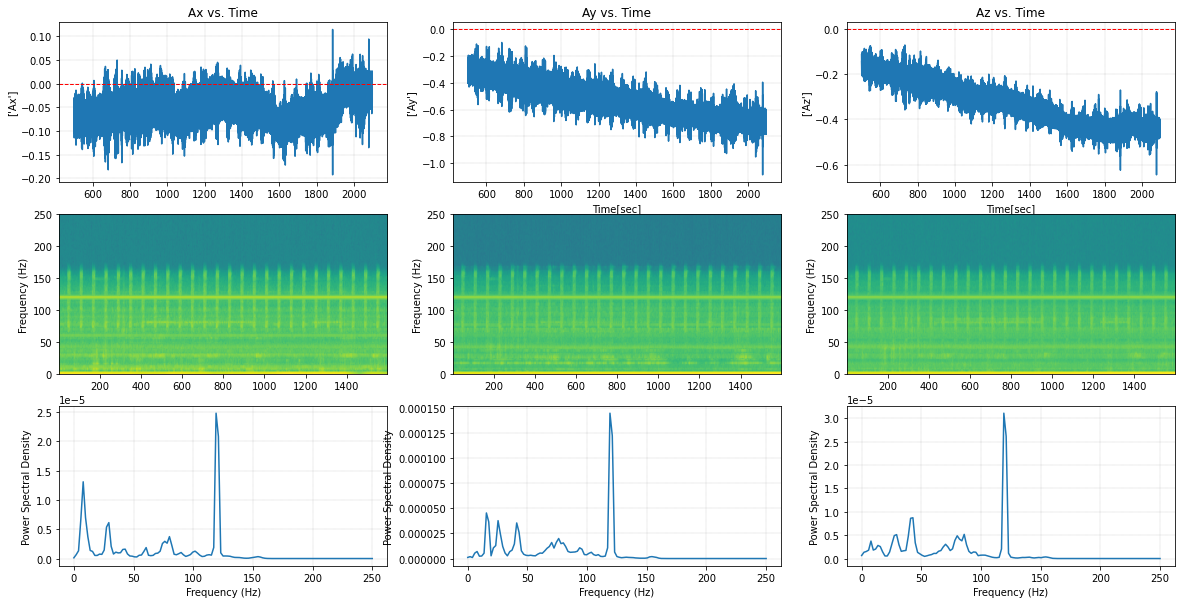

In [77]:
fig, ax = plt.subplots(3,3,figsize=(20, 10))


ax[0,0]=sns.lineplot(data=df, x=df['time[sec]'], y=df["Ax"],ax=ax[0,0])
ax[0,0].set(ylabel=["Ax"], xlabel=None)
ax[0,0].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax[0,0].grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax[0,0].axhline(linewidth=1, color='r',linestyle='--')
ax[0,0].set_title('Ax vs. Time')

ax[1,0].specgram(df["Ax"],Fs=sampling_rate);
ax[1,0].set(xlabel=None, ylabel="Frequency (Hz)");
ax[2,0].plot(fsx,psx)
ax[2,0].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
ax[2,0].grid(which='major',linestyle='--', linewidth='0.1', color='black')


ax[0,1]=sns.lineplot(data=df, x=df['time[sec]'], y=df["Ay"],ax=ax[0,1])
ax[0,1].set(xlabel='Time[sec]', ylabel=["Ay"])
ax[0,1].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax[0,1].grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax[0,1].axhline(linewidth=1, color='r',linestyle='--')
ax[0,1].set_title('Ay vs. Time');

ax[1,1].specgram(df["Ay"],Fs=sampling_rate);
ax[1,1].set(xlabel=None, ylabel="Frequency (Hz)");
ax[2,1].plot(fsy,psy);
ax[2,1].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
ax[2,1].grid(which='major',linestyle='--', linewidth='0.1', color='black')



ax[0,2]=sns.lineplot(data=df, x=df['time[sec]'], y=df["Az"],ax=ax[0,2])
ax[0,2].set(xlabel='Time[sec]', ylabel=["Az"])
ax[0,2].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
ax[0,2].grid(which='major',linestyle='--', linewidth='0.1', color='black')
ax[0,2].axhline(linewidth=1, color='r',linestyle='--')
ax[0,2].set_title('Az vs. Time')


ax[1,2].specgram(df["Az"],Fs=sampling_rate);
ax[1,2].set(xlabel=None, ylabel="Frequency (Hz)");
ax[2,2].plot(fsz,psz);
ax[2,2].set(xlabel='Frequency (Hz)', ylabel="Power Spectral Density")
ax[2,2].grid(which='major',linestyle='--', linewidth='0.1', color='black')


#fig.savefig("ABR-TS-F-PSD.jpg")

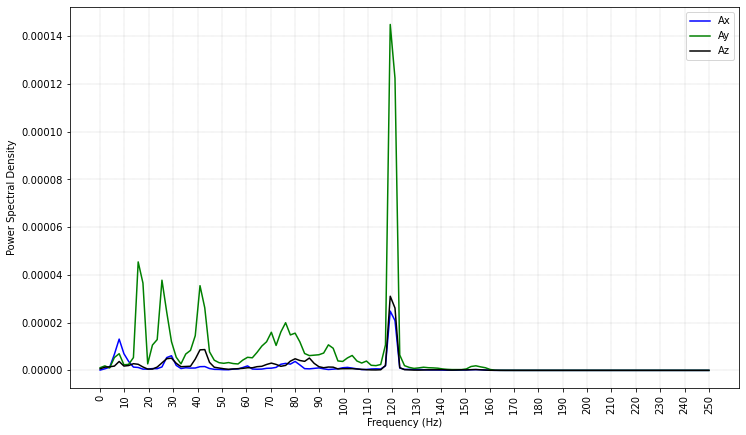

In [78]:
plt.figure(figsize=(12, 7))
plt.plot(fsx,psx,color = 'b',label='Ax')
plt.plot(fsy,psy,color = 'g',label='Ay')
plt.plot(fsz,psz,color = 'k',label='Az')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
plt.xticks(np.arange(min(fsz), max(fsz)+1, 10))
plt.xticks(rotation=90)
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.legend()
plt.show()

<h1>After Bell Ring Analysis -- Filtered</h1>

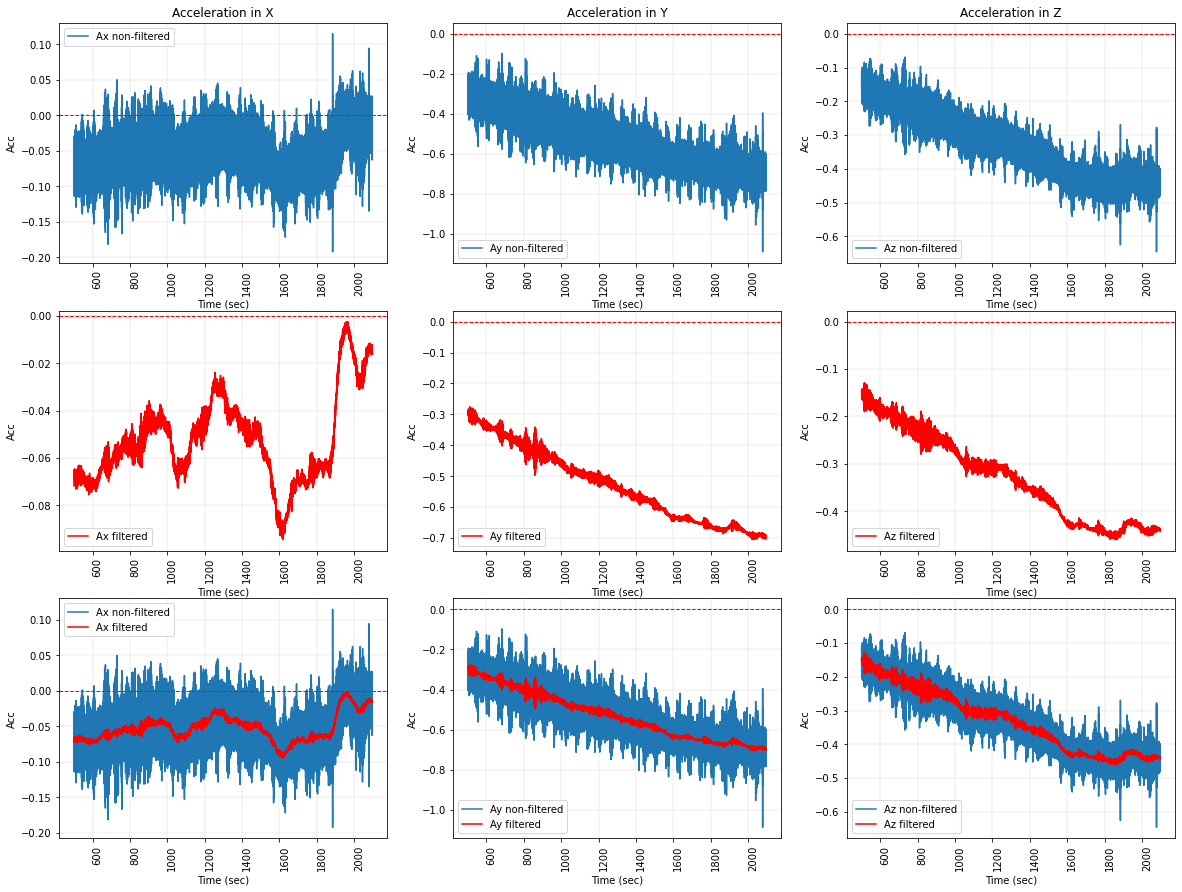

In [79]:
fs = 500       # sample rate, Hz
cutoff = 4      # desired cutoff frequency of the filter, Hz ,
nyq = 0.5 * fs  # Nyquist Frequency
order = 3       # sin wave can be approx represented as quadratic


Ax_data_filtered = butter_lowpass_filter(df['Ax'], cutoff, fs, order)
Ay_data_filtered = butter_lowpass_filter(df['Ay'], cutoff, fs, order)
Az_data_filtered = butter_lowpass_filter(df['Az'], cutoff, fs, order)


fig, ax = plt.subplots(3,3,figsize=(20, 15))


ax[0,0].plot(df['time[sec]'].values, df["Ax"],label='Ax non-filtered')
ax[0,0].set_title('Acceleration in X')
ax[1,0].plot(df['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')

ax[2,0].plot(df['time[sec]'].values, df["Ax"],label='Ax non-filtered')
ax[2,0].plot(df['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')


ax[0,1].plot(df['time[sec]'].values, df["Ay"],label='Ay non-filtered')
ax[0,1].set_title('Acceleration in Y')
ax[1,1].plot(df['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')

ax[2,1].plot(df['time[sec]'].values, df["Ay"],label='Ay non-filtered')
ax[2,1].plot(df['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')


ax[0,2].plot(df['time[sec]'].values, df["Az"],label='Az non-filtered')
ax[0,2].set_title('Acceleration in Z')
ax[1,2].plot(df['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')

ax[2,2].plot(df['time[sec]'].values, df["Az"],label='Az non-filtered')
ax[2,2].plot(df['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')


for i in [0,1,2]:
    for j in [0,1,2]:
        ax[i,j].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
        ax[i,j].grid(which='major',linestyle='--', linewidth='0.1', color='black')
        ax[i,j].axhline(linewidth=1, color='r',linestyle='--')
        ax[i,j].set(xlabel='Time (sec)', ylabel="Acc");
        plt.setp(ax[i,j].get_xticklabels(), rotation=90, ha="left")
        ax[i,j].legend()

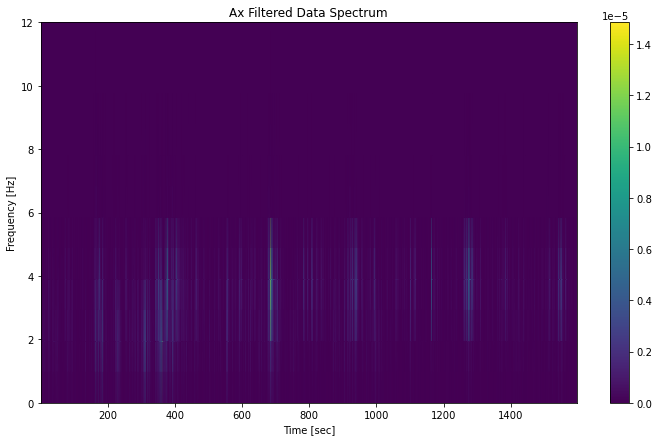

In [80]:
plt.figure(figsize=(12, 7))
fs = 500
f, t, Sxx = signal.spectrogram(Ax_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,12))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ax Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

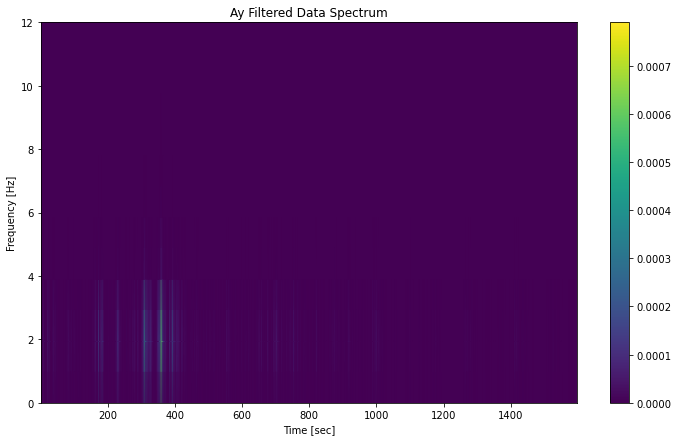

In [81]:
plt.figure(figsize=(12, 7))
fs = 500
f, t, Sxx = signal.spectrogram(Ay_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,12))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ay Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

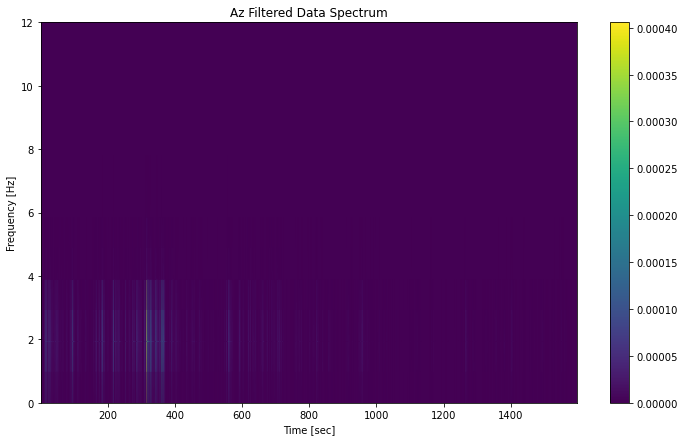

In [82]:
plt.figure(figsize=(12, 7))
fs = 500
f, t, Sxx = signal.spectrogram(Az_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,12))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Az Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<h1> After ring - 10 sec - between 1000 sec to 1010 sec </h1>

In [83]:
ne_after_rings_short = ne_df.set_index('time[sec]')
ne_after_rings_short= ne_after_rings_short.loc[1000:1002]
ne_after_rings_short['time[sec]'] = ne_after_rings_short.index
ne_after_rings_short.head(5)

Ax        Ay        Az   ATotal[mG]  Ts[deg.C]  time[sec]
time[sec]                                                                 
1000.000  -0.040412 -0.475883 -0.247359  1002.927171    16.1582   1000.000
1000.002  -0.048935 -0.438928 -0.236630  1002.919189    16.1582   1000.002
1000.004  -0.071704 -0.424921 -0.249087  1002.896454    16.1582   1000.004
1000.006  -0.067472 -0.450432 -0.271618  1002.900152    16.1582   1000.006
1000.008  -0.038207 -0.457644 -0.272691  1002.929319    16.1582   1000.008

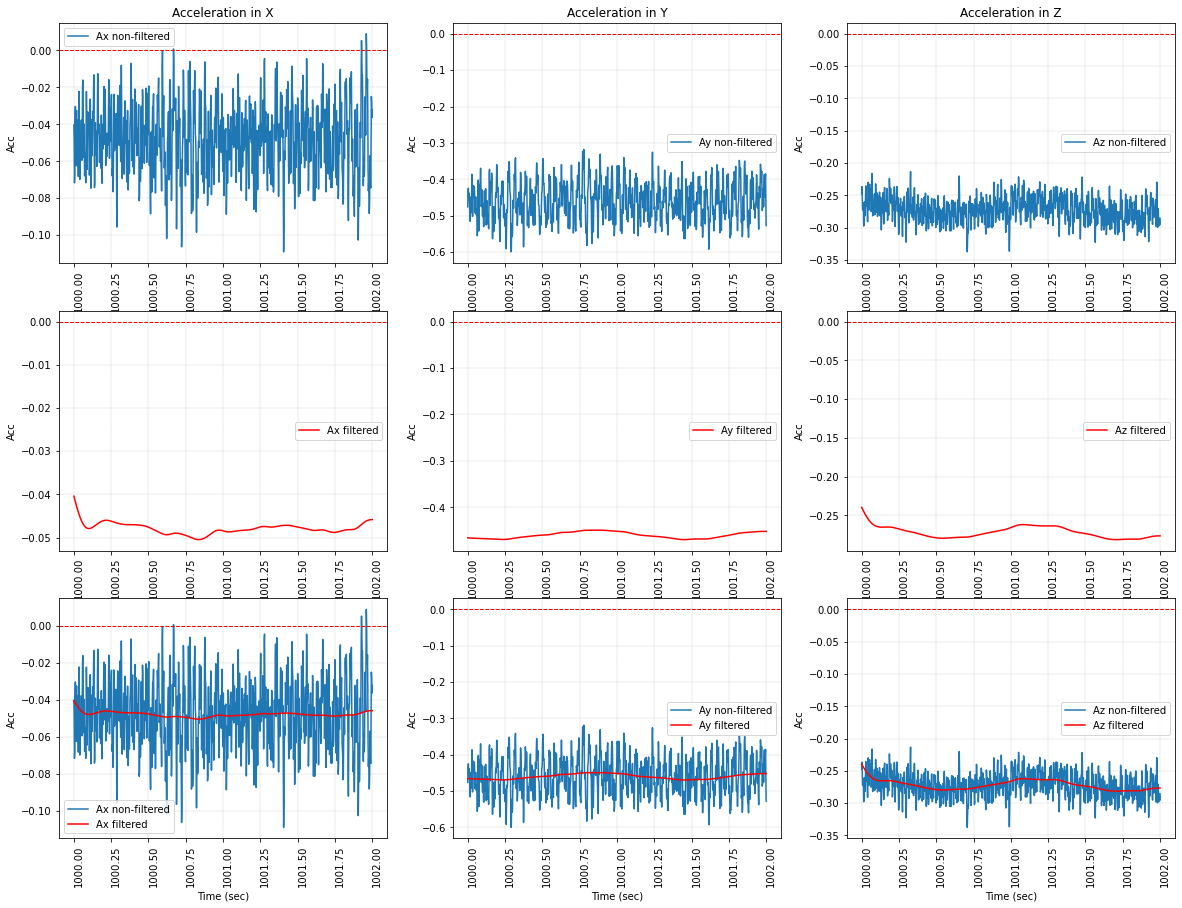

In [84]:
#### Create a filtering function

import numpy as np
from scipy.signal import butter,filtfilt

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

fs = 500       # sample rate, Hz
cutoff = 4      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 3       # sin wave can be approx represented as quadratic


Ax_data_filtered = butter_lowpass_filter(ne_after_rings_short['Ax'], cutoff, fs, order)
Ay_data_filtered = butter_lowpass_filter(ne_after_rings_short['Ay'], cutoff, fs, order)
Az_data_filtered = butter_lowpass_filter(ne_after_rings_short['Az'], cutoff, fs, order)




fig, ax = plt.subplots(3,3,figsize=(20, 15))


ax[0,0].plot(ne_after_rings_short['time[sec]'].values, ne_after_rings_short["Ax"],label='Ax non-filtered')
ax[0,0].set_title('Acceleration in X')
ax[1,0].plot(ne_after_rings_short['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')

ax[2,0].plot(ne_after_rings_short['time[sec]'].values, ne_after_rings_short["Ax"],label='Ax non-filtered')
ax[2,0].plot(ne_after_rings_short['time[sec]'].values,Ax_data_filtered,label='Ax filtered',color ='red')


ax[0,1].plot(ne_after_rings_short['time[sec]'].values, ne_after_rings_short["Ay"],label='Ay non-filtered')
ax[0,1].set_title('Acceleration in Y')
ax[1,1].plot(ne_after_rings_short['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')

ax[2,1].plot(ne_after_rings_short['time[sec]'].values, ne_after_rings_short["Ay"],label='Ay non-filtered')
ax[2,1].plot(ne_after_rings_short['time[sec]'].values,Ay_data_filtered,label='Ay filtered',color ='red')


ax[0,2].plot(ne_after_rings_short['time[sec]'].values, ne_after_rings_short["Az"],label='Az non-filtered')
ax[0,2].set_title('Acceleration in Z')
ax[1,2].plot(ne_after_rings_short['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')

ax[2,2].plot(ne_after_rings_short['time[sec]'].values, ne_after_rings_short["Az"],label='Az non-filtered')
ax[2,2].plot(ne_after_rings_short['time[sec]'].values,Az_data_filtered,label='Az filtered',color ='red')


for i in [0,1,2]:
    for j in [0,1,2]:
        ax[i,j].grid(which='minor',linestyle='-', linewidth='0.1', color='black')
        ax[i,j].grid(which='major',linestyle='--', linewidth='0.1', color='black')
        ax[i,j].axhline(linewidth=1, color='r',linestyle='--')
        ax[i,j].set(xlabel='Time (sec)', ylabel="Acc");
        plt.setp(ax[i,j].get_xticklabels(), rotation=90, ha="left")
        ax[i,j].legend()
        
#fig.savefig("FR-unf-and-f-plot.jpg")

In [85]:
Ax_data_filtered = butter_lowpass_filter(ne_after_rings_short['Ax'], cutoff, fs, order)
Ay_data_filtered = butter_lowpass_filter(ne_after_rings_short['Ay'], cutoff, fs, order)
Az_data_filtered = butter_lowpass_filter(ne_after_rings_short['Az'], cutoff, fs, order)

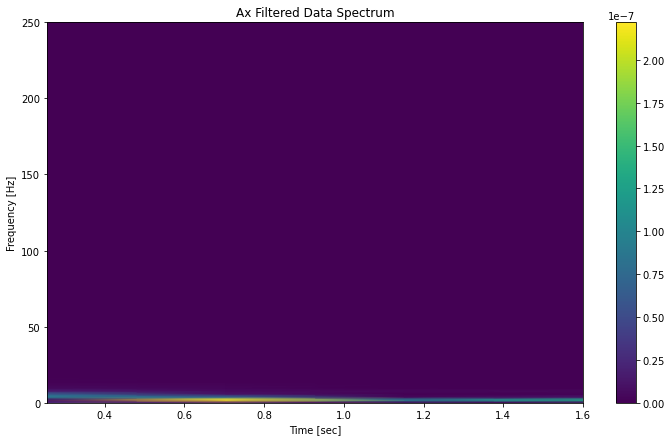

In [86]:
plt.figure(figsize=(12, 7))
fs = 500
f, t, Sxx = signal.spectrogram(Ax_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ax Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

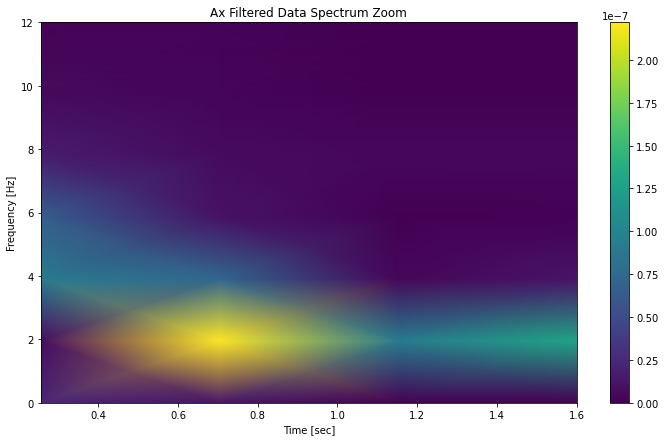

In [87]:
plt.figure(figsize=(12, 7))
fs = 500
f, t, Sxx = signal.spectrogram(Ax_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim((0,12))
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ax Filtered Data Spectrum Zoom')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

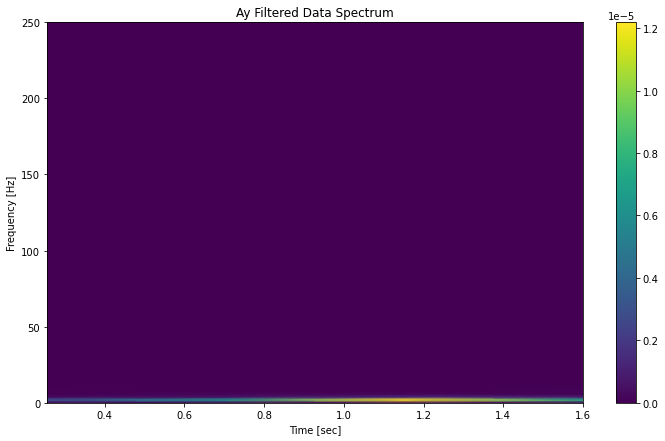

In [88]:
plt.figure(figsize=(12, 7))
fs = 500
f, t, Sxx = signal.spectrogram(Ay_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ay Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

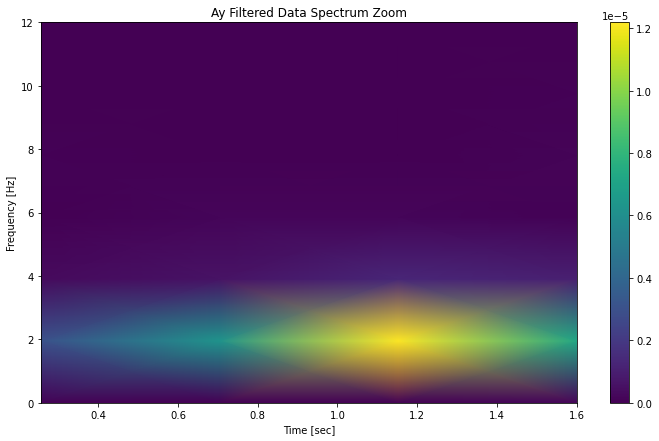

In [89]:
plt.figure(figsize=(12, 7))
fs = 500
f, t, Sxx = signal.spectrogram(Ay_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Ay Filtered Data Spectrum Zoom')
plt.ylim((0,12))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

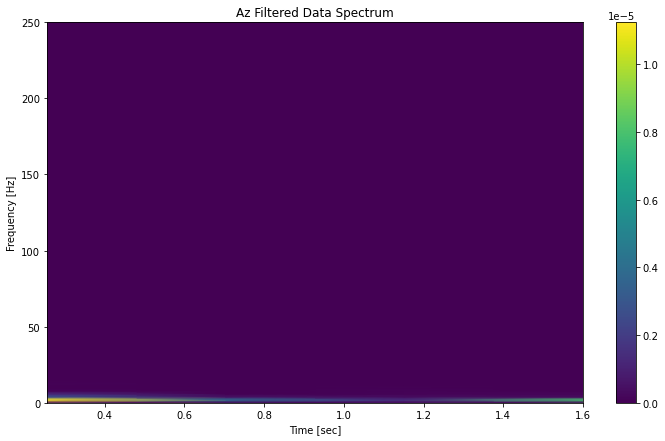

In [90]:
plt.figure(figsize=(12, 7))
fs = 500
f, t, Sxx = signal.spectrogram(Az_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.title('Az Filtered Data Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

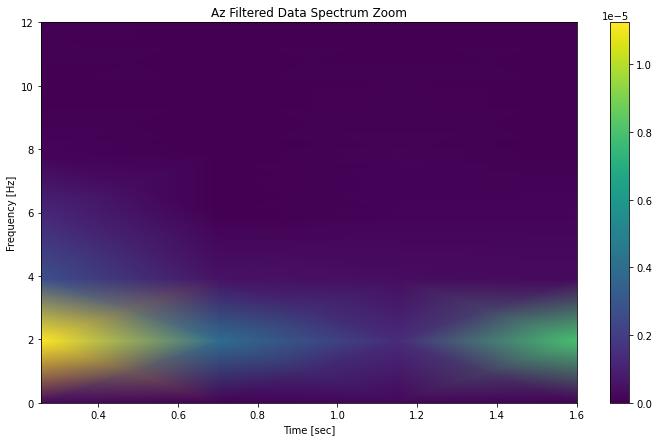

In [91]:
plt.figure(figsize=(12, 7))
fs = 500
f, t, Sxx = signal.spectrogram(Az_data_filtered, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.colorbar(mappable=None,use_gridspec=True)
plt.ylim((0,12))
plt.title('Az Filtered Data Spectrum Zoom')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<h1>Exploration Inclination</h1>

In [92]:
i_df=ne_df.copy()
i_df.head(3)


time[sec]        Ax        Ay        Az   ATotal[mG]  Ts[deg.C]
Sample No.                                                                 
1               0.000  0.000000  0.000000  0.000000  1002.975834    15.4248
2               0.002 -0.015080 -0.038802 -0.013232  1002.960147    15.4248
3               0.004 -0.007391 -0.048876  0.010670  1002.967973    15.4248

Axis Direction Ressources: https://www.digikey.in/en/articles/using-an-accelerometer-for-inclination-sensing

In [93]:
i_df["theta_x"] = np.arctan(np.sqrt(i_df["Ay"]**2 +i_df["Az"]**2)/i_df["Ax"])
i_df["theta_y"] = np.arctan(i_df["Ay"]/np.sqrt(i_df["Ax"]**2 +i_df["Az"]**2))
i_df["theta_z"] = np.arctan(i_df["Az"]/np.sqrt(i_df["Ax"]**2 +i_df["Ay"]**2))

In [94]:
i_df=i_df.fillna(value=0)
i_df.head(3)

time[sec]        Ax        Ay        Az   ATotal[mG]  Ts[deg.C]  \
Sample No.                                                                    
1               0.000  0.000000  0.000000  0.000000  1002.975834    15.4248   
2               0.002 -0.015080 -0.038802 -0.013232  1002.960147    15.4248   
3               0.004 -0.007391 -0.048876  0.010670  1002.967973    15.4248   

             theta_x   theta_y   theta_z  
Sample No.                                
1           0.000000  0.000000  0.000000  
2          -1.218318 -1.093609 -0.307754  
3          -1.424117 -1.311221  0.212592

/Users/abdoulaziz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


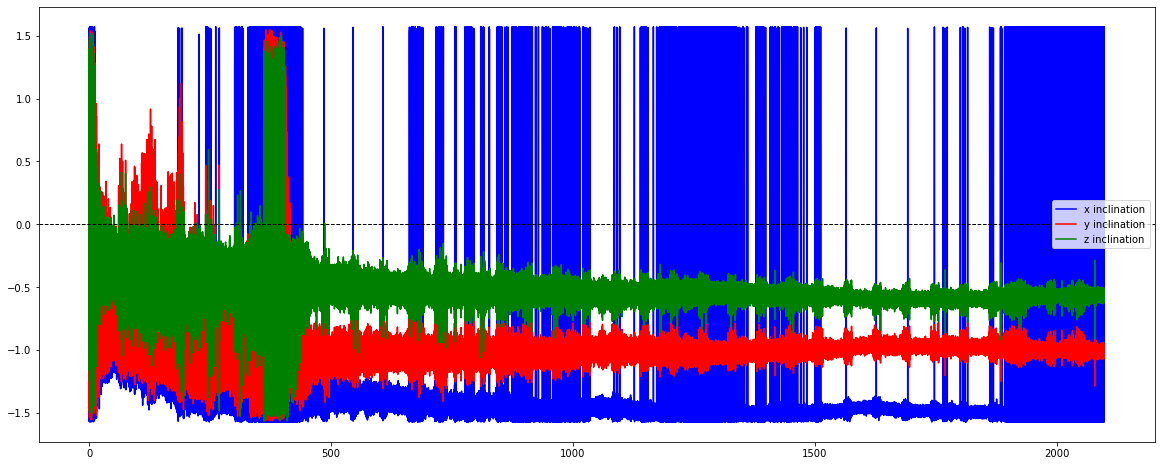

In [95]:
plt.figure(figsize=(20, 8))
plt.plot(i_df['time[sec]'],i_df['theta_x'],color='b',label ='x inclination')
plt.plot(i_df['time[sec]'],i_df['theta_y'],color='r',label ='y inclination')
plt.plot(i_df['time[sec]'],i_df['theta_z'],color='g',label ='z inclination')
plt.axhline(linewidth=1, color='k',linestyle='--')
plt.legend();

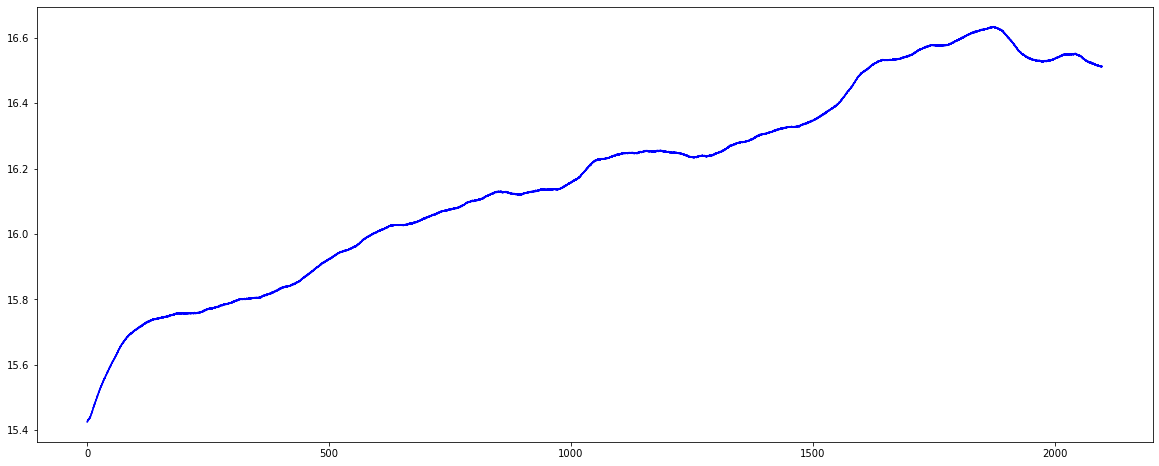

In [96]:
plt.figure(figsize=(20, 8))
plt.plot(i_df['time[sec]'],i_df['Ts[deg.C]'],color='b')

In [97]:
i_df.iloc[len(i_df)-1]

time[sec]     2097.142000
Ax              -0.020742
Ay              -0.652909
Az              -0.449538
ATotal[mG]    1002.942691
Ts[deg.C]       16.512700
theta_x         -1.544636
theta_y         -0.967323
theta_z         -0.602741
Name: 1048572, dtype: float64

<h1> Next Steps </h1>

* Due to the great amount of data, we are planning on plotting multtiple plots analysing the data more in depth
* We are planning on LowPassing the Full Data in order to observe Frequencies and see how oscillation varies between axis.
* Plot variations for the X, Y, and Z accross all 4 columns.